# Moire 1D lattice
I will use this notebook to explore the physics of a model that is two 1D chains displaced by a small amount $\epsilon$. I am interested in the band structure of this bi-lattice. 

I will model it as a tight-binding lattice with two hopping parameters $t_1$ and $t_2$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def create_H(t1,t2,N):
    '''
    t1,t2 are two TB parameters,
    N is the number of bilattice points
    
    The size of the Hamiltonian is 2N x 2N
    '''
    def matrix_element(x,y):
        if x == y:
            return t1+t2
        elif min(x,y) % 2 == 0 and abs(x-y) == 1:
            return -t1
        elif min(x,y) % 2 == 1 and abs(x-y) == 1:
            return -t2
        else:
            return 0
        
    vec_matrix_ele = np.vectorize(matrix_element)
    X,Y = np.meshgrid(np.arange(2*N),np.arange(2*N))
    
    H = vec_matrix_ele(X,Y)
    return H
        

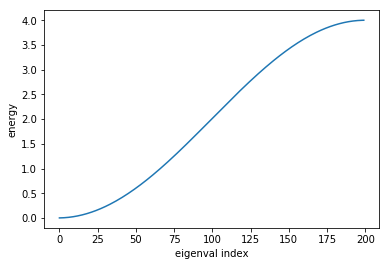

In [10]:
# simple Hamiltonian
H = create_H(1,1,100)
u,v = np.linalg.eig(H)
plt.plot(np.sort(np.abs(u)))
plt.xlabel("eigenval index")
plt.ylabel("energy")

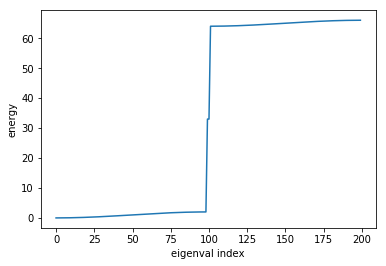

In [21]:
t1 = 1
t2 =32

H = create_H(t1,t2,100)
u,v = np.linalg.eig(H)
plt.plot(np.sort(np.abs(u)))
plt.xlabel("eigenval index")
plt.ylabel("energy")

In [34]:
data = []
t2_vec = np.logspace(-1,1,100)
for t2 in t2_vec:
    H = create_H(t1,t2,100)
    u,v = np.linalg.eig(H)
    data.append(np.sort(np.abs(u))/(t1+t2))

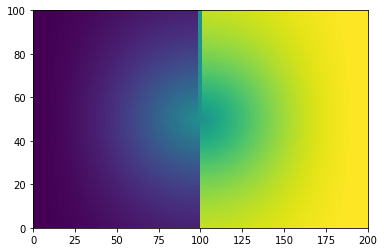

In [35]:
plt.pcolor(data)